
# Phase 1: Business Understanding

<h3>Objective</h3>
The goal is to predict the sales volume for each unique inventory item and warehouse combination for the next 14 days. Accurate predictions will enable Rohlik Group to:
<ul>
    <li>Optimize inventory management.</li>
    <li>Improve supply chain efficiency.</li>
    <li>Reduce food waste and delivery costs.</li>
    <li>Enhance customer satisfaction by ensuring product availability.</li>
</ul>

<h3>Business Constraints</h3> 

<ul>
    <li>Predictions must be made for specific combinations of inventory items and dates.</li>
    <li>The evaluation metric is Weighted Mean Absolute Error (WMAE), which means predictions for items with higher weights are more critical.</li>
    <li>Test data has features like availability and discounts missing, requiring the model to generalize well with incomplete data.</li>
</ul>




<h3>Key Questions</h3>

<ul>
    <li>How do factors like historical orders, discounts, prices, and holidays impact sales?</li>
    <li>Can sales patterns differ across warehouses or product categories?</li>
    <li>Are there seasonal trends or recurring patterns in the data?</li>
</ul>




<h3>Risks and Challenges</h3>
<ul>
    <li>Missing values in features like availability and discounts in the test set may lead to reduced model accuracy.</li>
    <li>The presence of public holidays or shop closures could introduce sharp sales deviations.</li>
    <li>The dataset size (313.39MB) could pose computational challenges for training models efficiently.</li>
</ul>




# Phase2 : Data Understanding 


## Step 1: Import Required Libraries and Load Datasets

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



# Load datasets
calendar_df = pd.read_csv('/kaggle/input/rohlik-sales-forecasting-challenge-v2/calendar.csv')
inventory_df = pd.read_csv('/kaggle/input/rohlik-sales-forecasting-challenge-v2/inventory.csv')
sales_test_df = pd.read_csv('/kaggle/input/rohlik-sales-forecasting-challenge-v2/sales_test.csv')
sales_train_df = pd.read_csv('/kaggle/input/rohlik-sales-forecasting-challenge-v2/sales_train.csv')
solution_df = pd.read_csv('/kaggle/input/rohlik-sales-forecasting-challenge-v2/solution.csv')
test_weights_df = pd.read_csv('/kaggle/input/rohlik-sales-forecasting-challenge-v2/test_weights.csv')

In [2]:
# Display first few rows of each dataset to understand the structure
print("Calendar Data:")
print(calendar_df.head())

Calendar Data:
         date holiday_name  holiday  shops_closed  winter_school_holidays  \
0  2022-03-16          NaN        0             0                       0   
1  2020-03-22          NaN        0             0                       0   
2  2018-02-07          NaN        0             0                       0   
3  2018-08-10          NaN        0             0                       0   
4  2017-10-26          NaN        0             0                       0   

   school_holidays    warehouse  
0                0  Frankfurt_1  
1                0  Frankfurt_1  
2                0  Frankfurt_1  
3                0  Frankfurt_1  
4                0     Prague_2  


In [3]:
print("\nInventory Data:")
print(inventory_df.head())


Inventory Data:
   unique_id  product_unique_id        name  L1_category_name_en  \
0       5255               2583  Pastry_196               Bakery   
1       4948               2426     Herb_19  Fruit and vegetable   
2       2146               1079      Beet_2  Fruit and vegetable   
3        501                260  Chicken_13        Meat and fish   
4       4461               2197   Chicory_1  Fruit and vegetable   

         L2_category_name_en        L3_category_name_en  \
0               Bakery_L2_14               Bakery_L3_26   
1  Fruit and vegetable_L2_30  Fruit and vegetable_L3_86   
2   Fruit and vegetable_L2_3  Fruit and vegetable_L3_65   
3        Meat and fish_L2_13        Meat and fish_L3_27   
4  Fruit and vegetable_L2_17  Fruit and vegetable_L3_33   

         L4_category_name_en    warehouse  
0                Bakery_L4_1     Prague_3  
1   Fruit and vegetable_L4_1     Prague_3  
2  Fruit and vegetable_L4_34     Prague_1  
3         Meat and fish_L4_5     Prague_1  

In [4]:
print("\nSales Test Data:")
print(sales_test_df.head())


Sales Test Data:
   unique_id        date warehouse  total_orders  sell_price_main  \
0       1226  2024-06-03    Brno_1        8679.0            13.13   
1       1226  2024-06-11    Brno_1        8795.0            13.13   
2       1226  2024-06-13    Brno_1       10009.0            13.13   
3       1226  2024-06-15    Brno_1        8482.0            13.13   
4       1226  2024-06-09    Brno_1        8195.0            13.13   

   type_0_discount  type_1_discount  type_2_discount  type_3_discount  \
0          0.00000              0.0              0.0              0.0   
1          0.15873              0.0              0.0              0.0   
2          0.15873              0.0              0.0              0.0   
3          0.15873              0.0              0.0              0.0   
4          0.00000              0.0              0.0              0.0   

   type_4_discount  type_5_discount  type_6_discount  
0              0.0              0.0              0.0  
1              0.0

In [5]:
print("\nSales Train Data:")
print(sales_train_df.head())


Sales Train Data:
   unique_id        date   warehouse  total_orders  sales  sell_price_main  \
0       4845  2024-03-10  Budapest_1        6436.0  16.34           646.26   
1       4845  2021-05-25  Budapest_1        4663.0  12.63           455.96   
2       4845  2021-12-20  Budapest_1        6507.0  34.55           455.96   
3       4845  2023-04-29  Budapest_1        5463.0  34.52           646.26   
4       4845  2022-04-01  Budapest_1        5997.0  35.92           486.41   

   availability  type_0_discount  type_1_discount  type_2_discount  \
0          1.00          0.00000              0.0              0.0   
1          1.00          0.00000              0.0              0.0   
2          1.00          0.00000              0.0              0.0   
3          0.96          0.20024              0.0              0.0   
4          1.00          0.00000              0.0              0.0   

   type_3_discount  type_4_discount  type_5_discount  type_6_discount  
0              0.0 

In [6]:
print("\nSolution Data:")
print(solution_df.head())


Solution Data:
                id  sales_hat
0  1226_2024-06-03          0
1  1226_2024-06-11          0
2  1226_2024-06-13          0
3  1226_2024-06-15          0
4  1226_2024-06-09          0


In [7]:
print("\nTest Weights Data:")
print(test_weights_df.head())


Test Weights Data:
   unique_id    weight
0          0  2.535369
1          1  3.888933
2          2  5.885237
3          3  2.139552
4          5  3.021715


## Step 2: Check for Missing Values

In [8]:
# Check for missing values in each dataset
print("\nMissing Values in Calendar Dataset:")
print(calendar_df.isnull().sum())


Missing Values in Calendar Dataset:
date                          0
holiday_name              22086
holiday                       0
shops_closed                  0
winter_school_holidays        0
school_holidays               0
warehouse                     0
dtype: int64


In [9]:
print("\nMissing Values in Inventory Dataset:")
print(inventory_df.isnull().sum())


Missing Values in Inventory Dataset:
unique_id              0
product_unique_id      0
name                   0
L1_category_name_en    0
L2_category_name_en    0
L3_category_name_en    0
L4_category_name_en    0
warehouse              0
dtype: int64


In [10]:
print("\nMissing Values in Sales Test Dataset:")
print(sales_test_df.isnull().sum())


Missing Values in Sales Test Dataset:
unique_id          0
date               0
warehouse          0
total_orders       0
sell_price_main    0
type_0_discount    0
type_1_discount    0
type_2_discount    0
type_3_discount    0
type_4_discount    0
type_5_discount    0
type_6_discount    0
dtype: int64


In [11]:
print("\nMissing Values in Sales Train Dataset:")
print(sales_train_df.isnull().sum())


Missing Values in Sales Train Dataset:
unique_id           0
date                0
warehouse           0
total_orders       52
sales              52
sell_price_main     0
availability        0
type_0_discount     0
type_1_discount     0
type_2_discount     0
type_3_discount     0
type_4_discount     0
type_5_discount     0
type_6_discount     0
dtype: int64


In [12]:
print("\nMissing Values in Solution Dataset:")
print(solution_df.isnull().sum())


Missing Values in Solution Dataset:
id           0
sales_hat    0
dtype: int64


In [13]:
print("\nMissing Values in Test Weights Dataset:")
print(test_weights_df.isnull().sum())


Missing Values in Test Weights Dataset:
unique_id    0
weight       0
dtype: int64


## Step 3: Data Distribution (Descriptive Statistics)

In [14]:
# Descriptive statistics for numerical columns
print("\nDescriptive Statistics for Sales Train Data:")
print(sales_train_df.describe())


Descriptive Statistics for Sales Train Data:
          unique_id  total_orders         sales  sell_price_main  \
count  4.007419e+06  4.007367e+06  4.007367e+06     4.007419e+06   
mean   2.740801e+03  5.995722e+03  1.083808e+02     1.814199e+02   
std    1.558566e+03  2.479598e+03  3.603327e+02     4.611014e+02   
min    0.000000e+00  4.580000e+02  0.000000e+00     2.000000e-02   
25%    1.398000e+03  4.402000e+03  1.798000e+01     2.113000e+01   
50%    2.744000e+03  5.515000e+03  3.952000e+01     4.564000e+01   
75%    4.084000e+03  8.011000e+03  9.447000e+01     1.121300e+02   
max    5.431000e+03  1.847500e+04  2.631619e+04     2.168299e+04   

       availability  type_0_discount  type_1_discount  type_2_discount  \
count  4.007419e+06     4.007419e+06     4.007419e+06     4.007419e+06   
mean   9.253107e-01     8.518626e-03     1.240899e-04     1.163193e-03   
std    1.796205e-01     5.147027e-02     5.142815e-03     1.879977e-02   
min    1.000000e-02    -2.094930e+01     0.00

In [15]:
print("\nDescriptive Statistics for Sales Test Data:")
print(sales_test_df.describe())


Descriptive Statistics for Sales Test Data:
          unique_id  total_orders  sell_price_main  type_0_discount  \
count  47021.000000  47021.000000     47021.000000     47021.000000   
mean    2749.678016   6880.911337       206.350987         0.013532   
std     1551.488719   2525.038306       525.128185         0.059923   
min        1.000000   1189.000000         0.130000         0.000000   
25%     1417.000000   5390.000000        20.110000         0.000000   
50%     2767.000000   6382.000000        49.040000         0.000000   
75%     4076.000000   8919.000000       120.580000         0.000000   
max     5431.000000  12374.000000     11084.520000         0.885580   

       type_1_discount  type_2_discount  type_3_discount  type_4_discount  \
count     47021.000000     47021.000000          47021.0     47021.000000   
mean          0.000251         0.004904              0.0         0.007142   
std           0.007095         0.028592              0.0         0.032099   
min    

In [16]:
# Distribution of sales across the different warehouses (categorical variable)
print("\nSales Train Distribution by Warehouse:")
print(sales_train_df['warehouse'].value_counts())


Sales Train Distribution by Warehouse:
warehouse
Prague_1       780566
Prague_3       779655
Prague_2       770709
Brno_1         643637
Budapest_1     574582
Munich_1       259333
Frankfurt_1    198937
Name: count, dtype: int64


In [17]:
# Distribution of sales in Sales Test by Warehouse
print("\nSales Test Distribution by Warehouse:")
print(sales_test_df['warehouse'].value_counts())


Sales Test Distribution by Warehouse:
warehouse
Prague_3       8751
Prague_1       8714
Prague_2       8655
Brno_1         7196
Budapest_1     6576
Munich_1       3907
Frankfurt_1    3222
Name: count, dtype: int64


In [18]:
# Distribution of unique_id in Inventory
print("\nInventory Distribution by Warehouse:")
print(inventory_df['warehouse'].value_counts())


Inventory Distribution by Warehouse:
warehouse
Budapest_1     949
Prague_3       867
Prague_1       863
Prague_2       860
Brno_1         763
Munich_1       643
Frankfurt_1    487
Name: count, dtype: int64


In [19]:
# Distribution of holidays in Calendar Data
print("\nHoliday Distribution in Calendar Data:")
print(calendar_df['holiday_name'].value_counts())


Holiday Distribution in Calendar Data:
holiday_name
Labour Day                                                     63
2nd Christmas Day                                              63
1st Christmas Day                                              63
International womens day                                       63
Christmas Eve                                                  63
New Years Day                                                  63
Easter Monday                                                  42
Good Friday                                                    42
Den boje za svobodu a demokracii                               36
Den vzniku samostatneho ceskoslovenskeho statu                 36
Jan Hus                                                        36
Den ceske statnosti                                            36
Den osvobozeni                                                 36
Cyrila a Metodej                                               36
Whit sunday            

## Step 4: Visualize the Data Distribution

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


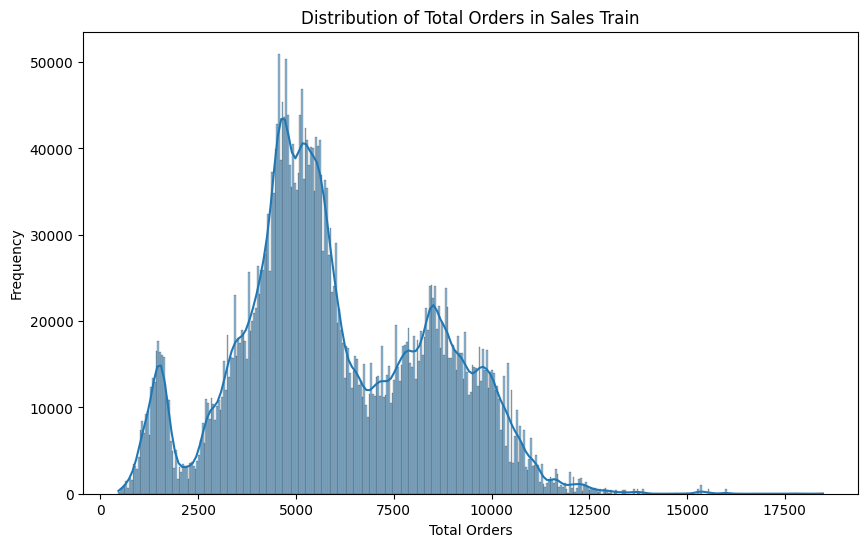

In [20]:
# Plot distribution of total orders in Sales Train
plt.figure(figsize=(10, 6))
sns.histplot(sales_train_df['total_orders'], kde=True)
plt.title('Distribution of Total Orders in Sales Train')
plt.xlabel('Total Orders')
plt.ylabel('Frequency')
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


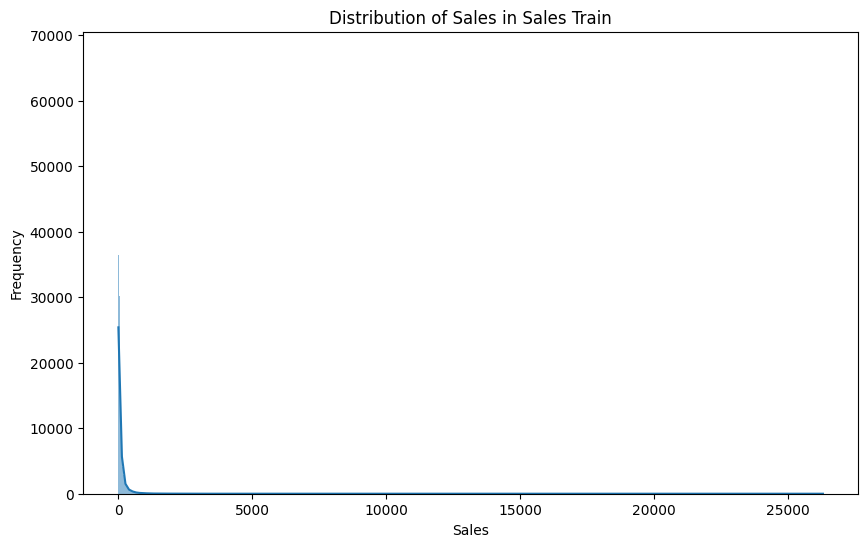

In [21]:
# Plot distribution of sales in Sales Train
plt.figure(figsize=(10, 6))
sns.histplot(sales_train_df['sales'], kde=True)
plt.title('Distribution of Sales in Sales Train')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


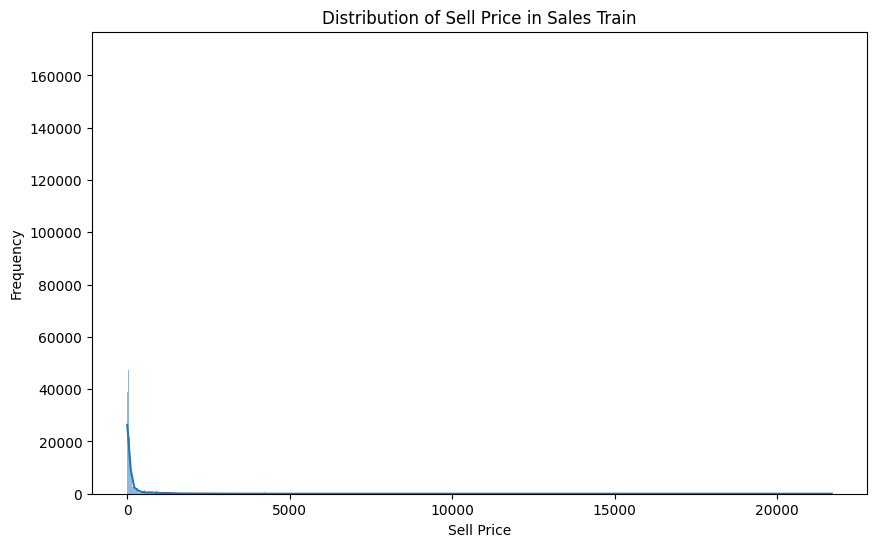

In [22]:
# Plot distribution of sell_price_main in Sales Train
plt.figure(figsize=(10, 6))
sns.histplot(sales_train_df['sell_price_main'], kde=True)
plt.title('Distribution of Sell Price in Sales Train')
plt.xlabel('Sell Price')
plt.ylabel('Frequency')
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


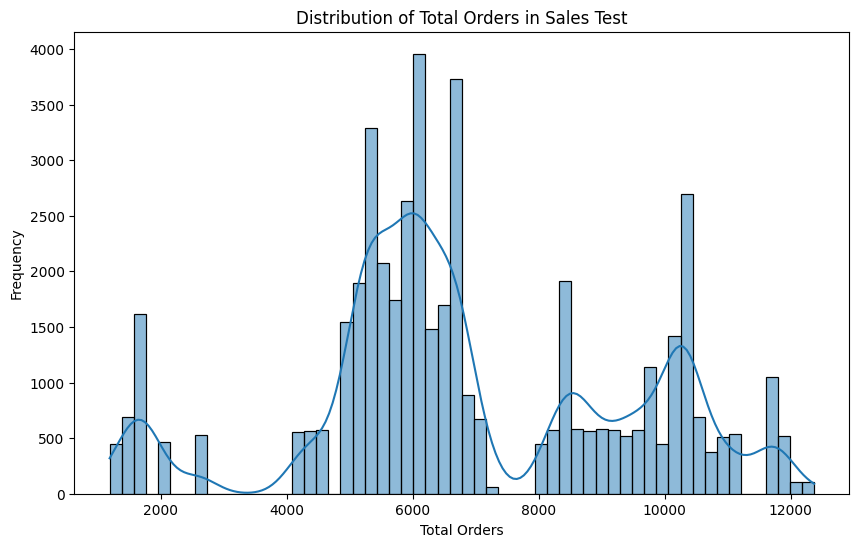

In [23]:
# Plot distribution of total_orders in Sales Test
plt.figure(figsize=(10, 6))
sns.histplot(sales_test_df['total_orders'], kde=True)
plt.title('Distribution of Total Orders in Sales Test')
plt.xlabel('Total Orders')
plt.ylabel('Frequency')
plt.show()

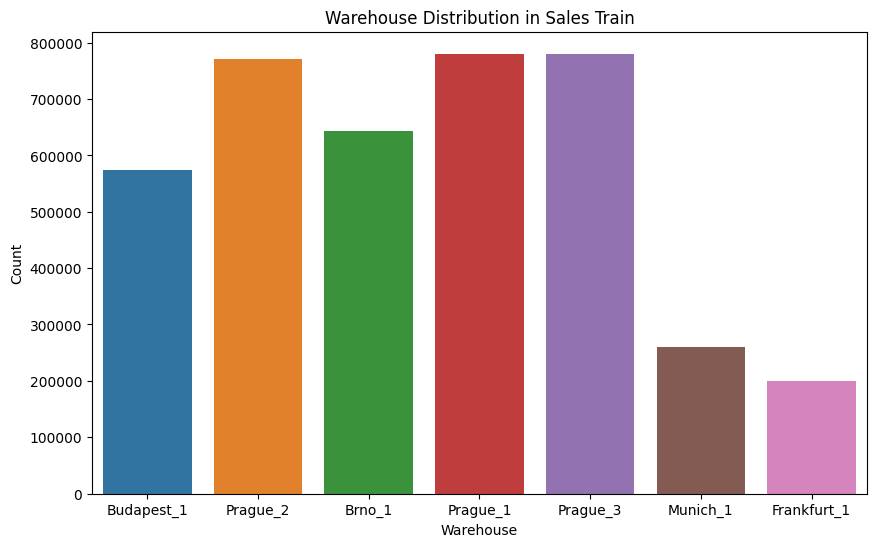

In [24]:
# Bar plot for warehouse distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='warehouse', data=sales_train_df)
plt.title('Warehouse Distribution in Sales Train')
plt.xlabel('Warehouse')
plt.ylabel('Count')
plt.show()

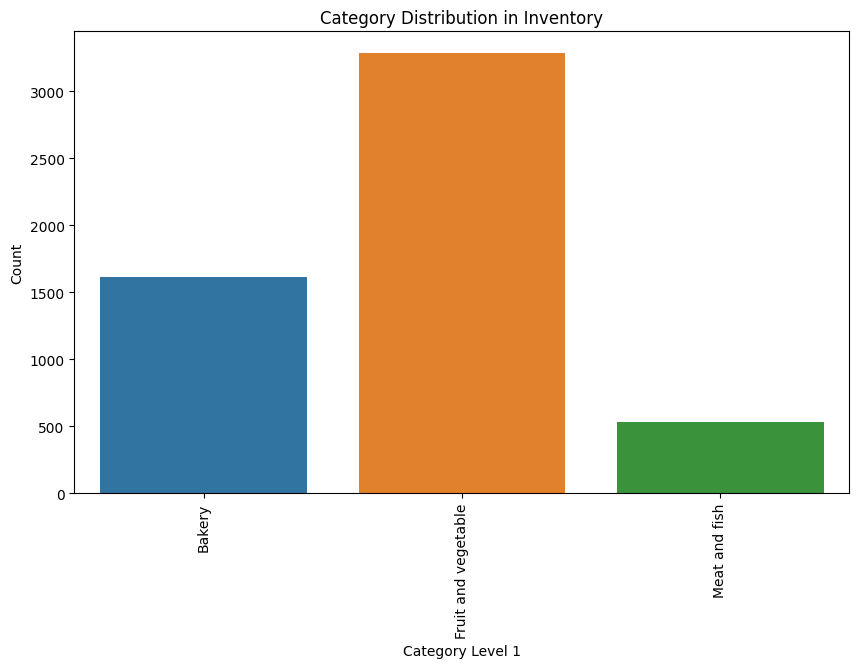

In [25]:
# Bar plot for category distribution in Inventory
plt.figure(figsize=(10, 6))
sns.countplot(x='L1_category_name_en', data=inventory_df)
plt.title('Category Distribution in Inventory')
plt.xlabel('Category Level 1')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

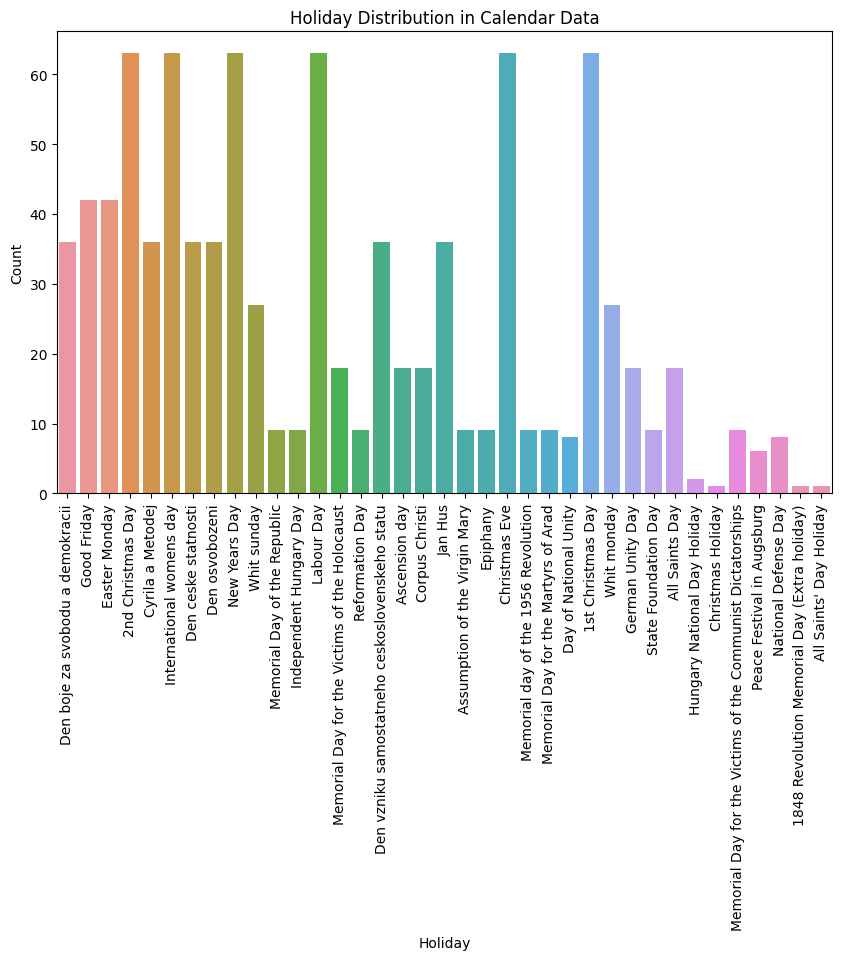

In [26]:
# Bar plot for holiday distribution in Calendar Data
plt.figure(figsize=(10, 6))
sns.countplot(x='holiday_name', data=calendar_df)
plt.title('Holiday Distribution in Calendar Data')
plt.xlabel('Holiday')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

## Step 5: Check Date Ranges and Align Datasets

In [27]:
# Check date range in sales_train and sales_test
print("\nDate Range in Sales Train Data:")
print(sales_train_df['date'].min(), "to", sales_train_df['date'].max())


Date Range in Sales Train Data:
2020-08-01 to 2024-06-02


In [28]:
print("\nDate Range in Sales Test Data:")
print(sales_test_df['date'].min(), "to", sales_test_df['date'].max())


Date Range in Sales Test Data:
2024-06-03 to 2024-06-16


In [29]:
print("\nDate Range in Calendar Data:")
print(calendar_df['date'].min(), "to", calendar_df['date'].max())


Date Range in Calendar Data:
2016-01-01 to 2024-12-31


## Step 6: Inspect Relationships Between Variables

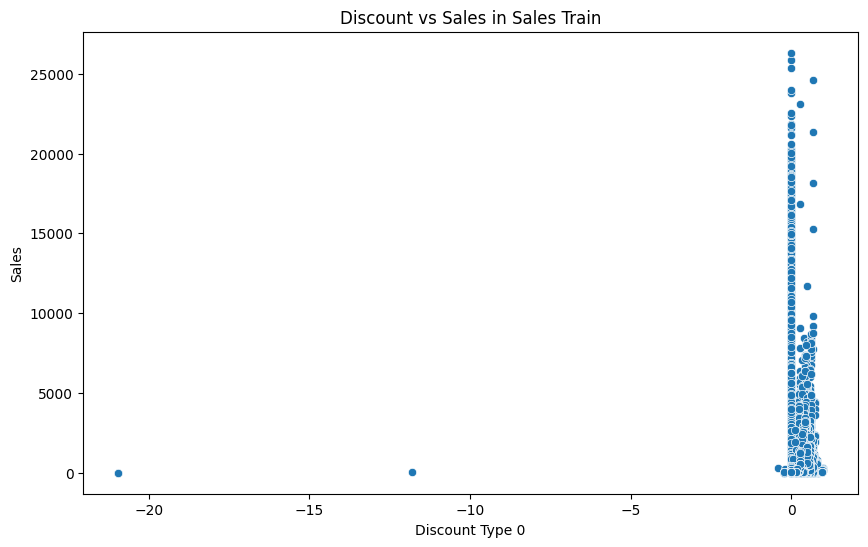

In [30]:
# Relationship between discounts and sales in Sales Train
plt.figure(figsize=(10, 6))
sns.scatterplot(x='type_0_discount', y='sales', data=sales_train_df)
plt.title('Discount vs Sales in Sales Train')
plt.xlabel('Discount Type 0')
plt.ylabel('Sales')
plt.show()

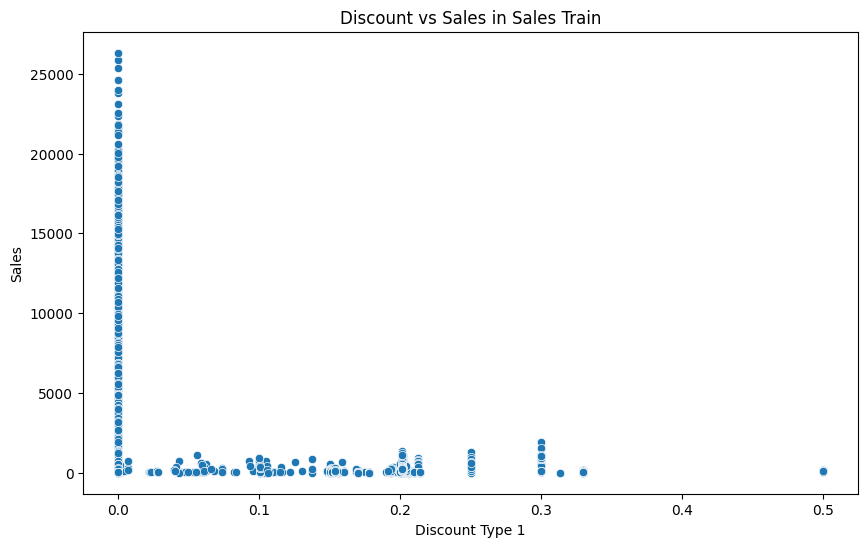

In [31]:
# Scatter plot for type_1_discount vs sales
plt.figure(figsize=(10, 6))
sns.scatterplot(x='type_1_discount', y='sales', data=sales_train_df)
plt.title('Discount vs Sales in Sales Train')
plt.xlabel('Discount Type 1')
plt.ylabel('Sales')
plt.show()

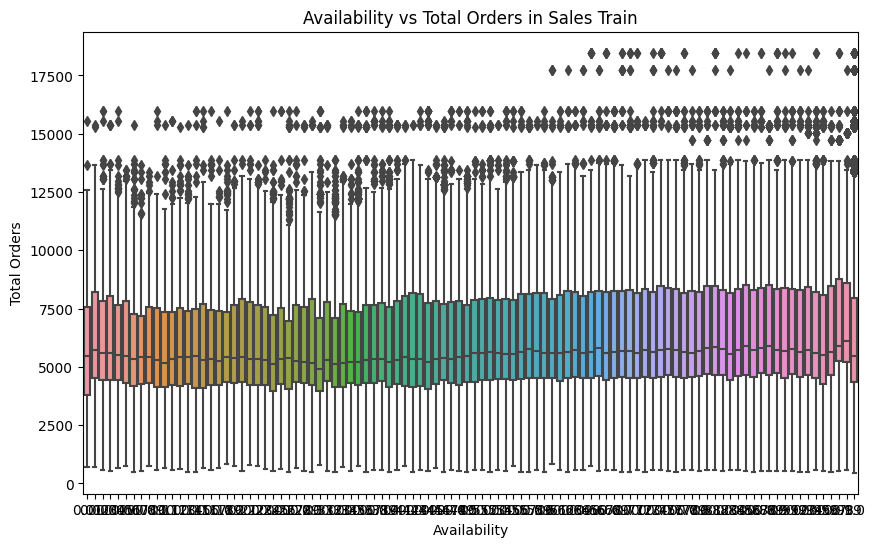

In [32]:
# Relationship between availability and total orders in Sales Train
plt.figure(figsize=(10, 6))
sns.boxplot(x='availability', y='total_orders', data=sales_train_df)
plt.title('Availability vs Total Orders in Sales Train')
plt.xlabel('Availability')
plt.ylabel('Total Orders')
plt.show()

# Phase 3: Data Preparation

## Step 1: Data Cleaning

### 1.1 Handle Missing Values

In [33]:
# Handle missing values for each dataset (if any)
# For simplicity, we'll fill missing numerical columns with the mean and categorical with the mode (most frequent value)

In [34]:
# Calendar Data - Fill NaN in 'holiday_name' with 'No Holiday' (since it’s categorical)
calendar_df['holiday_name'].fillna('No Holiday', inplace=True)

In [35]:
# Inventory Data - Fill missing categorical values (e.g., 'warehouse' or 'L1_category_name_en') with 'Unknown'
inventory_df['warehouse'].fillna('Unknown', inplace=True)
inventory_df['L1_category_name_en'].fillna('Unknown', inplace=True)

In [36]:
# Sales Test Data - Fill missing values with zeros for discounts (assuming no discounts by default)
sales_test_df.fillna({'type_0_discount': 0, 'type_1_discount': 0, 'type_2_discount': 0,
                      'type_3_discount': 0, 'type_4_discount': 0, 'type_5_discount': 0, 'type_6_discount': 0}, inplace=True)

In [37]:
# Sales Train Data - Fill missing values with zeros for discounts and availability
sales_train_df.fillna({'type_0_discount': 0, 'type_1_discount': 0, 'type_2_discount': 0,
                       'type_3_discount': 0, 'type_4_discount': 0, 'type_5_discount': 0, 'type_6_discount': 0,
                       'availability': 1}, inplace=True)

In [38]:
# Test Weights Data - No missing values based on the previous output
# Solution Data - No missing values based on the previous output

### 1.2 Remove Duplicates

In [39]:
# Check and remove duplicates
calendar_df.drop_duplicates(inplace=True)

In [40]:
inventory_df.drop_duplicates(inplace=True)

In [41]:
sales_test_df.drop_duplicates(inplace=True)

In [42]:
sales_train_df.drop_duplicates(inplace=True)

In [43]:
test_weights_df.drop_duplicates(inplace=True)

In [44]:
solution_df.drop_duplicates(inplace=True)

## Step 2: Feature Engineering

### 2.1 Extract Date Features

In [45]:
# Convert 'date' columns to datetime type
calendar_df['date'] = pd.to_datetime(calendar_df['date'])
sales_train_df['date'] = pd.to_datetime(sales_train_df['date'])
sales_test_df['date'] = pd.to_datetime(sales_test_df['date'])

In [46]:
# Extract year, month, day, weekday, and quarter from date
calendar_df['year'] = calendar_df['date'].dt.year
calendar_df['month'] = calendar_df['date'].dt.month
calendar_df['day'] = calendar_df['date'].dt.day
calendar_df['weekday'] = calendar_df['date'].dt.weekday
calendar_df['quarter'] = calendar_df['date'].dt.quarter

In [47]:
sales_train_df['year'] = sales_train_df['date'].dt.year
sales_train_df['month'] = sales_train_df['date'].dt.month
sales_train_df['day'] = sales_train_df['date'].dt.day
sales_train_df['weekday'] = sales_train_df['date'].dt.weekday
sales_train_df['quarter'] = sales_train_df['date'].dt.quarter

In [48]:
sales_test_df['year'] = sales_test_df['date'].dt.year
sales_test_df['month'] = sales_test_df['date'].dt.month
sales_test_df['day'] = sales_test_df['date'].dt.day
sales_test_df['weekday'] = sales_test_df['date'].dt.weekday
sales_test_df['quarter'] = sales_test_df['date'].dt.quarter

### 2.2 Create Additional Features

In [49]:
# Create a feature indicating if it's a holiday
calendar_df['is_holiday'] = (calendar_df['holiday'] == 1).astype(int)

In [50]:
# Create a feature indicating if it's school holiday
calendar_df['is_school_holiday'] = (calendar_df['school_holidays'] == 1).astype(int)

### 2.3 Price-related Features

In [51]:
# Final price after applying discounts for sales_train and sales_test
def calculate_final_price(df):
    # Calculate final price by applying discounts to 'sell_price_main'
    df['final_price'] = df['sell_price_main'] * (1 - df[['type_0_discount', 'type_1_discount', 
                                                         'type_2_discount', 'type_3_discount',
                                                         'type_4_discount', 'type_5_discount', 
                                                         'type_6_discount']].sum(axis=1))
    return df

In [52]:
sales_train_df = calculate_final_price(sales_train_df)
sales_test_df = calculate_final_price(sales_test_df)

## Step 3: Merge Dataframes

In [53]:
# Merge calendar data with sales train and sales test based on 'date'
sales_train_df = sales_train_df.merge(calendar_df, on='date', how='left')
sales_test_df = sales_test_df.merge(calendar_df, on='date', how='left')

In [54]:
# Merge inventory data with sales train and sales test based on 'unique_id'
sales_train_df = sales_train_df.merge(inventory_df, on='unique_id', how='left')
sales_test_df = sales_test_df.merge(inventory_df, on='unique_id', how='left')

In [55]:
# Merge test_weights with sales_test based on 'unique_id'
sales_test_df = sales_test_df.merge(test_weights_df, on='unique_id', how='left')

## Step 4: Data Normalization

In [56]:
"""
from sklearn.preprocessing import StandardScaler

# Apply scaling to numerical features
scaler = StandardScaler()

# Select numerical features to scale
numerical_cols = ['final_price', 'total_orders', 'sales']

# Scale numerical features
sales_train_df[numerical_cols] = scaler.fit_transform(sales_train_df[numerical_cols])
sales_test_df[numerical_cols] = scaler.transform(sales_test_df[numerical_cols])

"""

"\nfrom sklearn.preprocessing import StandardScaler\n\n# Apply scaling to numerical features\nscaler = StandardScaler()\n\n# Select numerical features to scale\nnumerical_cols = ['final_price', 'total_orders', 'sales']\n\n# Scale numerical features\nsales_train_df[numerical_cols] = scaler.fit_transform(sales_train_df[numerical_cols])\nsales_test_df[numerical_cols] = scaler.transform(sales_test_df[numerical_cols])\n\n"

In [57]:
# List of columns to scale (ensure they exist in both datasets)
numerical_cols = ['final_price', 'total_orders']

In [58]:
# Check which numerical columns exist in both train and test dataframes
numerical_cols_train = [col for col in numerical_cols if col in sales_train_df.columns]
numerical_cols_test = [col for col in numerical_cols if col in sales_test_df.columns]

In [59]:
from sklearn.preprocessing import StandardScaler

# Apply scaling to train and test datasets
scaler = StandardScaler()

In [60]:
# Scale numerical features in the training dataset
sales_train_df[numerical_cols_train] = scaler.fit_transform(sales_train_df[numerical_cols_train])

In [61]:
# Scale numerical features in the test dataset (use the same scaler fitted on the train data)
sales_test_df[numerical_cols_test] = scaler.transform(sales_test_df[numerical_cols_test])

## Step 5: Save the Prepared Datasets

In [62]:
# Save the prepared datasets
sales_train_df.to_csv('sales_train_prepared.csv', index=False)

In [63]:
sales_test_df.to_csv('sales_test_prepared.csv', index=False)